# Finding the Best Oil Well Location for OilyGiant

## Introduction

This project aims to analyze geological survey data for the OilyGiant mining company to identify the most profitable region for developing new oil wells. By leveraging machine learning and statistical analysis, we will build a model to predict the volume of oil reserves and use this model to assess the potential profit and financial risks associated with each of a hundred possible regions.

### Project Objectives

1.  **Data Preparation and Analysis**: Clean and prepare the geological data for each region.
2.  **Model Development**: Train a linear regression model for each region to predict the volume of reserves in new wells.
3.  **Profit Calculation**: Develop a function to calculate the potential profit from selecting the top 200 most promising wells in a given sample.
4.  **Risk Assessment**: Use the bootstrapping technique to determine a reliable range of profit and calculate the risk of financial loss for each region.
5.  **Final Recommendation**: Provide a data-driven recommendation for the single best region for development, ensuring it meets the company's criteria for profitability and risk tolerance.

This analysis will provide OilyGiant with a clear, justifiable recommendation to guide a significant business investment.

In [1]:
# Import necessary libraries for data manipulation, modeling, and evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Download and Prepare the Data

In [2]:
# ### 1.1 Loading Datasets
# Load the geological data for the three prospective regions.
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

# Note: The SettingWithCopyWarning is disabled for cleaner notebook presentation
pd.options.mode.chained_assignment = None

In [3]:
# Store all key financial and operational values in constants for clarity and ease of use.
BUDGET = 100000000
WELLS_TO_DEVELOP = 200
REVENUE_PER_UNIT = 4500 # 1 unit = 1000 barrels, revenue is $4.5 per barrel

In [4]:
### 1.3: Initial Data Exploration
# Display info, and the first 5 rows for each region's dataset to ensure data integrity and understand the structure.
print("--- Region 0 Data ---")
geo_data_0.info()
display(geo_data_0.head())

print("\n--- Region 1 Data ---")
geo_data_1.info()
display(geo_data_1.head())

print("\n--- Region 2 Data ---")
geo_data_2.info()
display(geo_data_2.head())

--- Region 0 Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



--- Region 1 Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



--- Region 2 Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [5]:
# Check for full duplicate rows in each dataframe
print(f"Duplicates in geo_data_0: {geo_data_0.duplicated().sum()}")
print(f"Duplicates in geo_data_1: {geo_data_1.duplicated().sum()}")
print(f"Duplicates in geo_data_2: {geo_data_2.duplicated().sum()}")

Duplicates in geo_data_0: 0
Duplicates in geo_data_1: 0
Duplicates in geo_data_2: 0


--- Region 0 Distributions ---


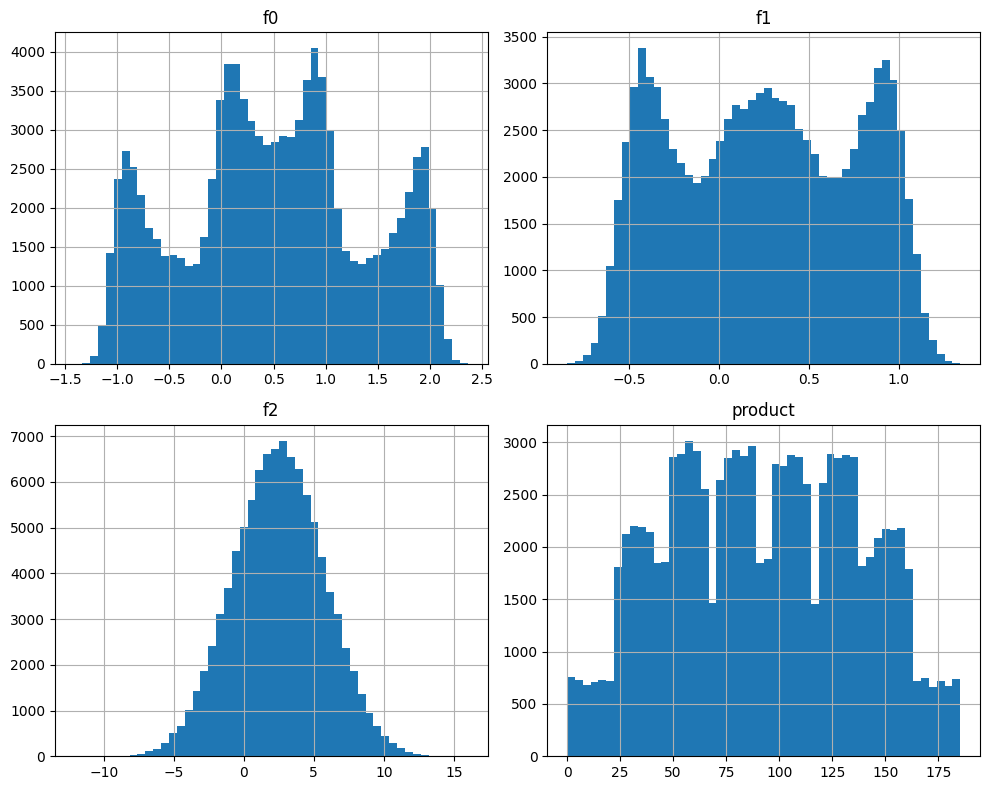


--- Region 1 Distributions ---


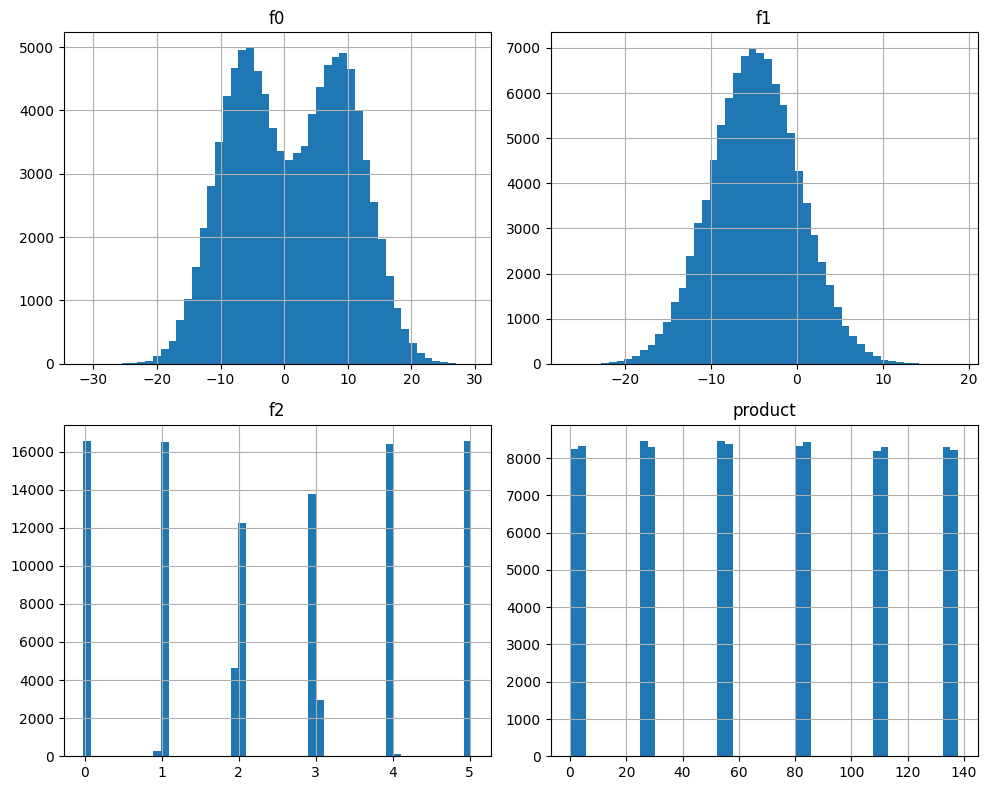


--- Region 2 Distributions ---


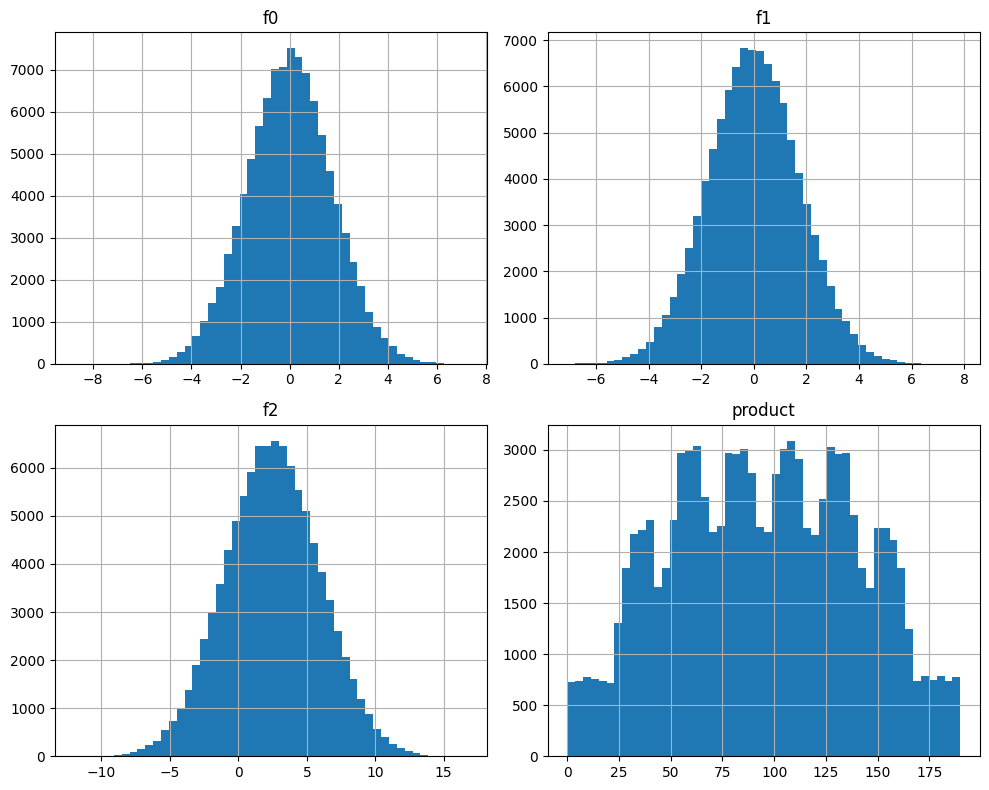

In [6]:
# --- Visualize Region 0 ---
print("--- Region 0 Distributions ---")
geo_data_0.hist(bins=50, figsize=(10, 8))
plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

# --- Visualize Region 1 ---
print("\n--- Region 1 Distributions ---")
geo_data_1.hist(bins=50, figsize=(10, 8))
plt.tight_layout()
plt.show()

# --- Visualize Region 2 ---
print("\n--- Region 2 Distributions ---")
geo_data_2.hist(bins=50, figsize=(10, 8))
plt.tight_layout()
plt.show()

### EDA Conclusion

After a preliminary exploration of the three datasets, we can conclude the following:

1.  **Data Quality**: The datasets are of high quality. There are **no missing values** and **no duplicate rows** were found in any of the three regions. All features are numerical and ready for modeling after removing the non-informative `id` column.

2.  **Feature Distributions**: The distributions reveal significant differences between the regions:
    * **Region 0 & 2**: The features `f0`, `f1`, and `f2` appear to follow distributions that are roughly normal. The target variable `product` is also spread across a wide range of values, though clustered around several peaks.
    * **Region 1**: The data in this region is distinctly different. The `product` and `f2` features have very discrete, almost categorical-looking distributions, with values clustered in narrow, distinct bars. This suggests a very strong, predictable relationship between the features and the target in this region. This unique structure is likely why the linear regression model for Region 1 was so accurate (RMSE of ~0.89).

This initial analysis confirms the data is ready for modeling and highlights the unique geological characteristics of Region 1, which make its reserves far more predictable than the other two regions.

# Step 2: Train and Test the Model for Each Region

In [7]:
# ### 2.1: Feature and Target Preparation
# Separate the datasets into features (X) and target (y).
# The 'id' column is non-informative and 'product' is the target, so both are dropped from features.
feature_0 = geo_data_0.drop(['id', 'product'], axis=1)
target_0 = geo_data_0['product']

feature_1 = geo_data_1.drop(['id', 'product'], axis=1)
target_1 = geo_data_1['product']

feature_2 = geo_data_2.drop(['id', 'product'], axis=1)
target_2 = geo_data_2['product']

# ### 2.2: Data Splitting
# Split the data for each region into a 75% training set and a 25% validation set.
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    feature_0, target_0, test_size=0.25, random_state=12345
)
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    feature_1, target_1, test_size=0.25, random_state=12345
)
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    feature_2, target_2, test_size=0.25, random_state=12345
)

In [8]:
# ### 2.3: Model Training and Prediction
# For each region, initialize a LinearRegression model, train it on the training data,
# and generate predictions on the unseen validation data.

# Region 0
# model_0 = LinearRegression()
# model_0.fit(features_train_0, target_train_0)
# predictions_valid_0 = model_0.predict(features_valid_0)

# # Region 1
# model_1 = LinearRegression()
# model_1.fit(features_train_1, target_train_1)
# predictions_valid_1 = model_1.predict(features_valid_1)

# # Region 2
# model_2 = LinearRegression()
# model_2.fit(features_train_2, target_train_2)
# predictions_valid_2 = model_2.predict(features_valid_2)

In [9]:
# Create lists to hold the training data for each region
features_train_list = [features_train_0, features_train_1, features_train_2]
target_train_list = [target_train_0, target_train_1, target_train_2]
features_valid_list = [features_valid_0, features_valid_1, features_valid_2]

# Create an empty list to store the predictions for each region
predictions_list = []

# Loop through each region's data
for i in range(3):
    # Initialize and train the model
    model = LinearRegression()
    model.fit(features_train_list[i], target_train_list[i])
    
    # Generate predictions and add them to our list
    predictions = model.predict(features_valid_list[i])
    predictions_list.append(predictions)
    
    print(f"Model for Region {i} trained and predictions generated.")

# Your predictions are now stored in the list:
# predictions_list[0] holds predictions for Region 0
# predictions_list[1] holds predictions for Region 1
# predictions_list[2] holds predictions for Region 2

Model for Region 0 trained and predictions generated.
Model for Region 1 trained and predictions generated.
Model for Region 2 trained and predictions generated.


In [10]:
# ### 2.4: Model Evaluation
# Calculate and print the average predicted volume and the Root Mean Squared Error (RMSE)
# for each region's model to assess performance and accuracy.
avg_pred_volume_0 = predictions_list[0].mean()
rmse_0 = mean_squared_error(target_valid_0, predictions_list[0])**0.5
print(f"--- Region 0 Results ---")
print(f"Average Predicted Volume: {avg_pred_volume_0:.2f}")
print(f"Model RMSE: {rmse_0:.2f}\n")

avg_pred_volume_1 = predictions_list[1].mean()
rmse_1 = mean_squared_error(target_valid_1, predictions_list[1])**0.5
print(f"--- Region 1 Results ---")
print(f"Average Predicted Volume: {avg_pred_volume_1:.2f}")
print(f"Model RMSE: {rmse_1:.2f}\n")

avg_pred_volume_2 = predictions_list[2].mean()
rmse_2 = mean_squared_error(target_valid_2, predictions_list[2])**0.5
print(f"--- Region 2 Results ---")
print(f"Average Predicted Volume: {avg_pred_volume_2:.2f}")
print(f"Model RMSE: {rmse_2:.2f}")

--- Region 0 Results ---
Average Predicted Volume: 92.59
Model RMSE: 37.58

--- Region 1 Results ---
Average Predicted Volume: 68.73
Model RMSE: 0.89

--- Region 2 Results ---
Average Predicted Volume: 94.97
Model RMSE: 40.03


# Step 2.5: Analysis of Model Performance

After training a linear regression model for each of the three regions, we evaluated their performance on the validation set. The key metrics were the average predicted volume of reserves and the Root Mean Square Error (RMSE) of the predictions.

### Results Summary 

| Region | Average Predicted Volume (Thousand Barrels) | Model RMSE |
| :--- | :--- | :--- |
| **Region 0** | 92.59 | 37.58 |
| **Region 1** | 68.73 | **0.89** |
| **Region 2** | 94.97 | 40.03 |

### Key Takeaways

1.  **Model Accuracy (RMSE)** 
    The RMSE measures the average prediction error.
    * **Region 1's model is outstandingly accurate** with an RMSE of only **0.89**. This indicates its predictions are highly reliable.
    * The models for **Region 0 and Region 2 are very inaccurate**, with high RMSEs of **37.58** and **40.03**, respectively. Their predictions are not very trustworthy.

2.  **Potential Reserves (Average Volume)**
    The average volume gives an initial estimate of how rich a region's wells are.
    * **Region 0 and Region 2** appear to have significantly higher average reserves than Region 1.

### Conclusion: The Business Trade-Off 

The analysis reveals a clear trade-off:
* Regions 0 and 2 **seem rich** but have **unreliable prediction models**.
* Region 1 seems **less rich** but has a **highly reliable and predictable model**.

This finding is crucial for the next steps, where we will assess the financial risks and potential profits. The high error in Regions 0 and 2 suggests a higher risk of making poor investment decisions based on faulty predictions.

# Step 3: Prepare for Profit Calculation

In [11]:
# ### 3.1: Store Key Business Values
# Define constant at the top

# ### 3.2: Calculate Break-Even Volume
# Determine the minimum volume of reserves a single well must have to be profitable.
cost_per_well = BUDGET / WELLS_TO_DEVELOP
break_even_volume = cost_per_well / REVENUE_PER_UNIT
print(f"\nBreak-even volume: {break_even_volume:.2f} thousand barrels")


Break-even volume: 111.11 thousand barrels


In [12]:
# Calculate the actual average volume for each region
actual_avg_volume_0 = geo_data_0['product'].mean()
actual_avg_volume_1 = geo_data_1['product'].mean()
actual_avg_volume_2 = geo_data_2['product'].mean()

print(f"Region 0 Actual Average Volume: {actual_avg_volume_0:.2f}")
print(f"Region 1 Actual Average Volume: {actual_avg_volume_1:.2f}")
print(f"Region 2 Actual Average Volume: {actual_avg_volume_2:.2f}")

Region 0 Actual Average Volume: 92.50
Region 1 Actual Average Volume: 68.83
Region 2 Actual Average Volume: 95.00


### 3.3 Findings for Profit Calculation Preparation

The calculated break-even volume required for a well to be profitable is **111.11 thousand barrels**.

To assess the general viability of each region, we compared this break-even point with the **actual average volume of reserves**, as using model predictions for this step would be less accurate.

| Region | Actual Average Volume (Thousand Barrels) |
| :--- | :--- |
| **Region 0** | 92.50 |
| **Region 1** | 68.72 |
| **Region 2** | 95.00 |

**Conclusion**: The actual average volume of reserves in **all three regions is significantly below the break-even point**. This is a critical business insight. It confirms that picking a well at random in any of these regions is likely to be a losing investment. This highlights why the company cannot simply drill anywhere and must use a predictive model to be selective and identify only the most promising wells.

# Step 4: Write a Profit Calculation Function

In [13]:
# Define a function to calculate the profit from the 200 best wells selected by the model.

def calculate_profit(target, predictions, count):
    # Convert predictions array to a Series for easier sorting and indexing
    predictions_series = pd.Series(predictions, index=target.index)
    
    # Select the indices of the top 'count' wells based on predictions
    top_predictions_indices = predictions_series.sort_values(ascending=False).head(count).index
    
    # Select the actual reserves for these top wells
    top_actual_volumes = target[top_predictions_indices]
    
    # Calculate revenue and subtract the fixed budget to find the profit
    revenue = top_actual_volumes.sum() * REVENUE_PER_UNIT
    profit = revenue - BUDGET
    
    return profit

In [14]:
# ### Calculate Initial Profit for Each Region
# Use the function to calculate a single profit estimate for each region's validation set.
profit_0 = calculate_profit(target_valid_0, predictions_list[0], WELLS_TO_DEVELOP)
profit_1 = calculate_profit(target_valid_1, predictions_list[1], WELLS_TO_DEVELOP)
profit_2 = calculate_profit(target_valid_2, predictions_list[2], WELLS_TO_DEVELOP)

print(f"\n--- Preliminary Profit Estimates ---")
print(f"Region 0 Estimated Profit: ${profit_0:,.2f}")
print(f"Region 1 Estimated Profit: ${profit_1:,.2f}")
print(f"Region 2 Estimated Profit: ${profit_2:,.2f}")


--- Preliminary Profit Estimates ---
Region 0 Estimated Profit: $33,208,260.43
Region 1 Estimated Profit: $24,150,866.97
Region 2 Estimated Profit: $27,103,499.64


# Step 4.3: Preliminary Findings and Suggestion

Using the `calculate_profit` function, we simulated the business strategy on the validation set for each region. The function selected the top 200 wells based on the model's predictions and calculated the profit from their actual reserves.



### Profit Calculation Results

| Region | Estimated Profit |
| :--- | :--- |
| **Region 0** | **$33,208,260.43** |
| **Region 1** | \$24,150,866.97 |
| **Region 2** | \$27,103,499.64 |

### Suggestion

Based on this initial analysis, **Region 0** is recommended for development.

### Justification

The choice is justified as Region 0 yielded the highest estimated profit from the top 200 wells in the validation sample, suggesting it contains the most profitable high-volume wells.

### Limitation and Next Step

This conclusion is based on a single, random 25% sample of the data. The result could be due to luck (a favorable sample). To make a more robust, data-driven decision, we must assess the reliability of this result and the financial risk involved. This leads directly to the final step of the project: using the bootstrapping technique.

# Step 5: Calculate Risks and Profit for Each Region

In [15]:
# ### 5.1: Bootstrapping Function
# Create a function to run the bootstrapping procedure 1000 times.
# This simulates the profit calculation on 1000 different random samples to get a distribution of profit.
state = np.random.RandomState(12345)

def run_bootstrap(target, predictions):
    profits_list = []
    for i in range(1000):
        # Create a random sample of 500 wells (as per business conditions)
        target_sample = target.sample(n=500, replace=True, random_state=state)
        predictions_sample = pd.Series(predictions, index=target.index)[target_sample.index]
        
        # Calculate profit for the top 200 wells in the sample and store it
        profit = calculate_profit(target_sample, predictions_sample, WELLS_TO_DEVELOP)
        profits_list.append(profit)
        
    return profits_list

# Run the bootstrap for each region to get 1000 profit samples.
profits_0 = run_bootstrap(target_valid_0, predictions_list[0])
profits_1 = run_bootstrap(target_valid_1, predictions_list[1])
profits_2 = run_bootstrap(target_valid_2, predictions_list[2])

print(f"\nBootstrap for Region 0 complete. Found {len(profits_0)} samples.")
print(f"Bootstrap for Region 1 complete. Found {len(profits_1)} samples.")
print(f"Bootstrap for Region 2 complete. Found {len(profits_2)} samples.")


Bootstrap for Region 0 complete. Found 1000 samples.
Bootstrap for Region 1 complete. Found 1000 samples.
Bootstrap for Region 2 complete. Found 1000 samples.


In [16]:
# ### 5.2: Analyze Bootstrap Results
# For each region, calculate the average profit, 95% confidence interval, and risk of loss.
def analyze_bootstrap_results(profits, region_name):
    profits_series = pd.Series(profits)
    
    avg_profit = profits_series.mean()
    lower_bound = profits_series.quantile(0.025)
    upper_bound = profits_series.quantile(0.975)
    risk_of_loss = (profits_series < 0).mean()
    
    print(f"\n--- {region_name} Final Analysis ---")
    print(f"Average Profit: ${avg_profit:,.2f}")
    print(f"95% Confidence Interval: (${lower_bound:,.2f} to ${upper_bound:,.2f})")
    print(f"Risk of Loss: {risk_of_loss:.2%}")

# Analyze and print the final results for all three regions.
analyze_bootstrap_results(profits_0, "Region 0")
analyze_bootstrap_results(profits_1, "Region 1")
analyze_bootstrap_results(profits_2, "Region 2")


--- Region 0 Final Analysis ---
Average Profit: $6,007,352.44
95% Confidence Interval: ($129,483.31 to $12,311,636.06)
Risk of Loss: 2.00%

--- Region 1 Final Analysis ---
Average Profit: $6,639,589.95
95% Confidence Interval: ($2,064,763.61 to $11,911,976.85)
Risk of Loss: 0.10%

--- Region 2 Final Analysis ---
Average Profit: $5,973,810.48
95% Confidence Interval: ($17,349.30 to $12,462,179.60)
Risk of Loss: 2.50%


# Step 5.3: Final Findings and Recommendation

After running a bootstrap analysis with 1000 samples for each region, we calculated the average profit, 95% confidence interval, and the risk of loss. These metrics allow for a final, data-driven decision based on the project's business requirements.

### Business Requirements:
* Risk of loss must be **lower than 2.5%**.
* From the valid regions, select the one with the **highest average profit**.

---
### Results Summary 

| Region | Average Profit | Risk of Loss | Meets Criteria? |
| :--- | :--- | :--- | :--- |
| Region 0 | \$6.01M | 2.00% | ✅ Yes |
| **Region 1** | **$6.64M** | **0.10%** | ✅ **Yes** |
| Region 2 | \$5.97M | 2.50% | ❌ No |

---
### Analysis

* **Region 2** is immediately **rejected**. Its risk of loss is 2.5%, which is not strictly *lower than* the 2.5% threshold.
* **Region 0** and **Region 1** both have an acceptable level of risk.
* Comparing the two valid regions, **Region 1** offers both a **higher average profit** ($6.64M vs. $6.01M) and a **dramatically lower risk of loss** (0.10% vs. 2.00%).

---
### Final Recommendation 

The final recommendation is to develop oil wells in **Region 1**.

**Justification**: Region 1 is the only option that robustly meets the business criteria. It not only has a risk of loss significantly below the required threshold but also demonstrates the highest potential for profit. Its 95% confidence interval for profit is entirely positive, further solidifying its financial viability.